In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SAMSUNG.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())


            Price
Date             
2018-01-02  51.02
2018-01-03  51.62
2018-01-04  51.08
2018-01-05  52.12
2018-01-08  52.02


In [12]:
# 2.  chia train test theo tỉ lệ 7:3
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]



In [13]:

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3134.382, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3128.713, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3130.665, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3130.668, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3127.127, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3130.284, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.513 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:

y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))



In [15]:

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7
 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7 70.7
 70.7 70.7]


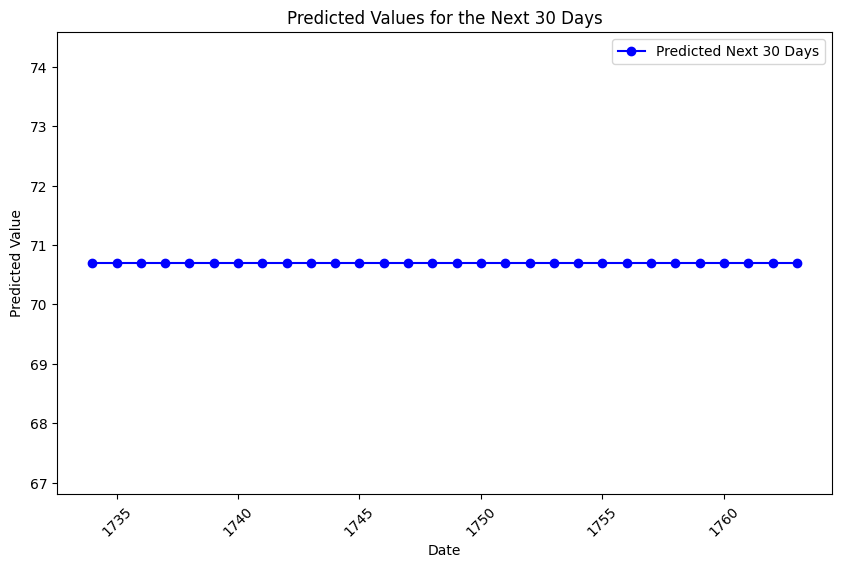

In [16]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 8.097000869267776
Testing MAPE: 0.1085136430561468
Testing MAE: 6.567307692307695


Testing RMSE: 8.097000869267776
Testing MAPE: 0.1085136430561468
Testing MAE: 6.567307692307695


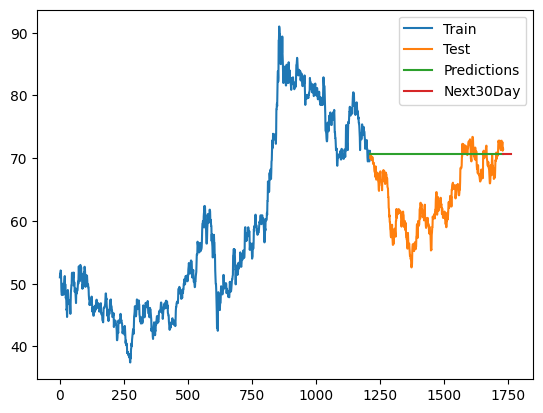

In [18]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [19]:
test_data.index

RangeIndex(start=1213, stop=1733, step=1)